In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv("Book1.csv")

In [7]:
df.head()

Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [9]:
df.describe()

Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%              32.341822    11.388153        36.349257   
50%              33.082008    11.983231        37.069367   
75%              33.711985    12.753850        37.716432   
max              36.139662    15.126994        40.005182   

       Length of Membership  Yearly Amount Spent  
count            500.000000           500.000000  
mean               3.533462           499.314038  
std                0.999278            79.314782  
min                0.269901           256.670582  
25%                2.930450           445.038277  
50%                3.533975           498.887875  
75%                4.126502           549.313828  
max                6.922689           765.518462

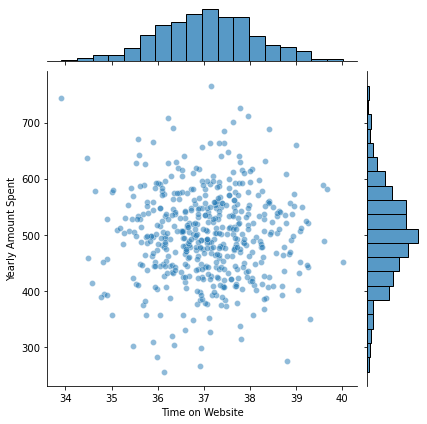

In [14]:
#EDA
sns.jointplot(x="Time on Website",y="Yearly Amount Spent",data=df,alpha=.5)

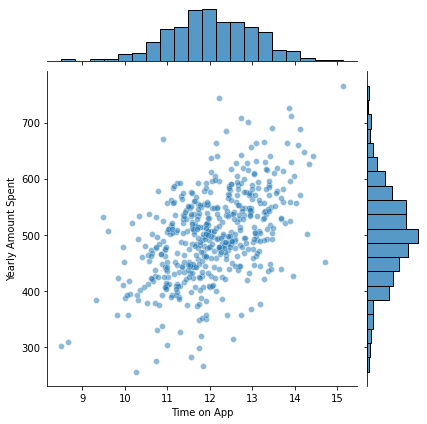

In [18]:
sns.jointplot(x="Time on App",y="Yearly Amount Spent",data=df,alpha=.5)

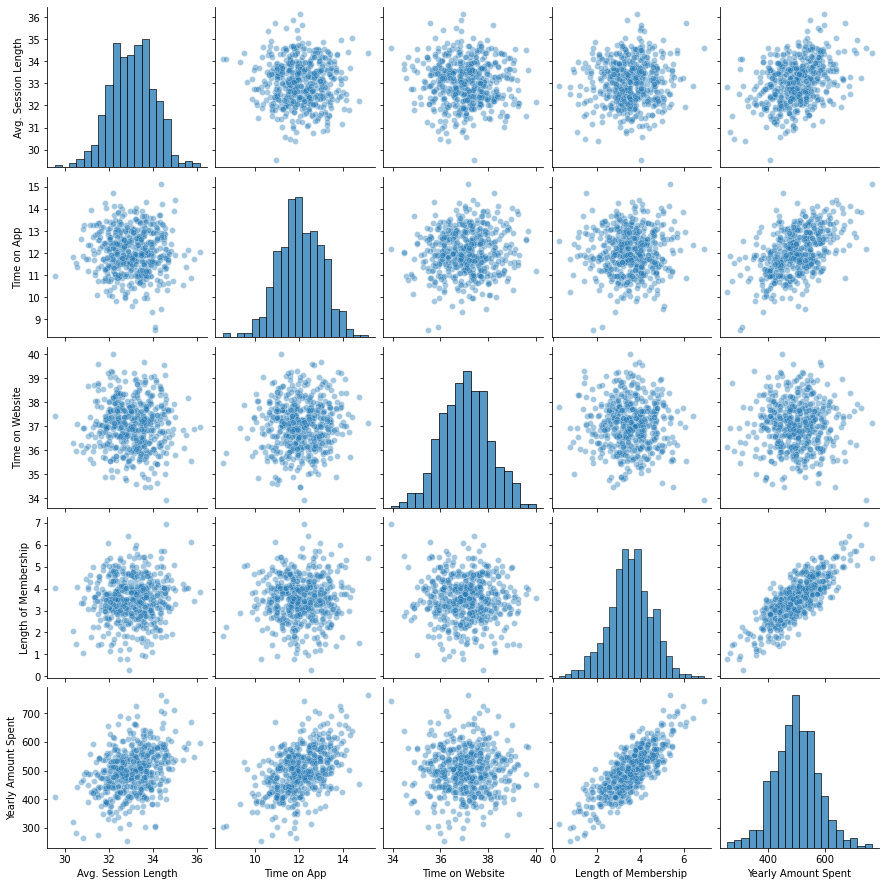

In [20]:
sns.pairplot(df,kind="scatter",plot_kws={'alpha':0.4})

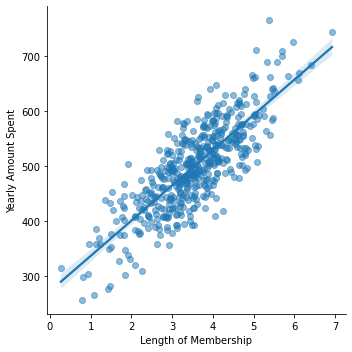

In [21]:
sns.lmplot(x="Length of Membership",y="Yearly Amount Spent",data=df,scatter_kws={"alpha":0.5})

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
X=df[['Avg. Session Length','Time on Website','Time on App','Length of Membership']]
y=df['Yearly Amount Spent']

In [25]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=42)

In [26]:
X_train

Avg. Session Length  Time on Website  Time on App  Length of Membership
5              33.871038        34.476878    12.026925              5.493507
116            33.925795        36.701052    12.011022              2.753424
45             34.555768        39.131097    12.170525              3.663105
16             32.125387        34.894093    11.733862              3.136133
462            33.503810        37.211153    11.233415              2.320550
..                   ...              ...          ...                   ...
106            32.291756        36.152462    12.190474              3.781823
270            34.006489        38.655095    12.956277              3.275734
348            31.812483        34.897828    10.886921              3.128639
435            32.259973        37.023479    14.132893              3.762070
102            32.425697        37.580190    11.448902              2.586968

[350 rows x 4 columns]

In [27]:
from sklearn.linear_model import LinearRegression

In [30]:
lm=LinearRegression()

In [31]:
lm.fit(X_train,y_train)

LinearRegression()

In [33]:
lm.coef_

array([25.72425621,  0.45914786, 38.59713548, 61.67473243])

In [35]:
cdf=pd.DataFrame(lm.coef_,X.columns,columns=["Coef"])
print(cdf)

                           Coef
Avg. Session Length   25.724256
Time on Website        0.459148
Time on App           38.597135
Length of Membership  61.674732


In [37]:
#predictions
predictions=lm.predict(X_test)
predictions

array([403.66993074, 542.57756279, 427.06591624, 502.02460418,
       410.12143558, 569.93442498, 531.93431357, 506.29651001,
       408.71870637, 473.97737102, 441.46912713, 425.33703067,
       425.12972304, 527.61676736, 431.45684042, 424.07691828,
       575.76543275, 484.8985653 , 458.35936887, 481.96502194,
       502.32441485, 513.63783571, 507.58877004, 646.57464281,
       450.24372153, 496.27043414, 556.40457802, 554.95630854,
       399.64237181, 325.84623149, 532.89783273, 478.12238679,
       501.05701852, 305.9733584 , 505.77244465, 483.79591959,
       518.83315284, 438.18241848, 456.71094212, 471.04609471,
       494.44008982, 445.31155776, 508.78802753, 501.04594194,
       488.83499651, 535.38079536, 595.20129815, 514.04714863,
       280.76758287, 433.10112339, 421.70823429, 481.23640159,
       584.71372254, 608.77480967, 563.98513435, 494.72804856,
       394.52133409, 456.41975284, 573.08767517, 499.69842395,
       512.83276999, 392.12434057, 480.05057696, 481.54

C:\Program Files\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Evaluation Of our LM Model')

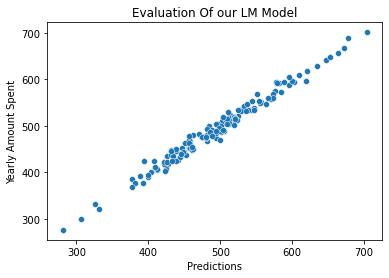

In [40]:
sns.scatterplot(predictions,y_test)
plt.xlabel("Predictions")
plt.title("Evaluation Of our LM Model")

In [42]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import math

In [43]:
print("MEAN_SQUARE ERROR",mean_squared_error(y_test,predictions))
print("MEAN_ABSOLIUTE ERROR",mean_absolute_error(y_test,predictions))
print("ROOT_MEAN_SQUARE ERROR",math.sqrt(mean_squared_error(y_test,predictions)))

MEAN_SQUARE ERROR 103.91554120775167
MEAN_ABSOLIUTE ERROR 8.42609163545146
ROOT_MEAN_SQUARE ERROR 10.193897253148654


In [45]:
#residuals
residuals=y_test - predictions
residuals

361    -2.636796
73     -7.800375
374    -8.463174
155     1.953775
104    -0.051824
         ...    
266    10.327175
23     15.027985
222   -16.778237
261    -6.021734
426    -4.371832
Name: Yearly Amount Spent, Length: 150, dtype: float64

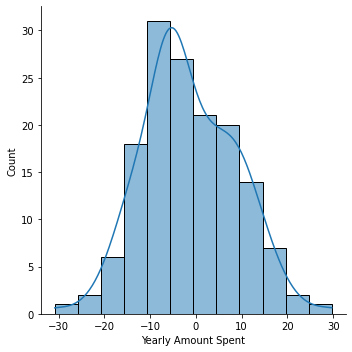

In [48]:
sns.displot(residuals,kde=True)

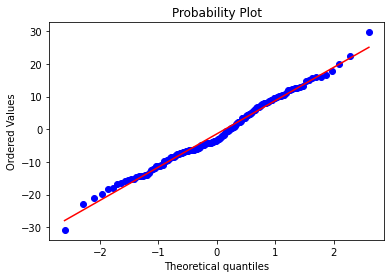

In [49]:
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()


In [ ]:
                                       vvvvvv